# Skaters (Season 2024/25) - Cumulative Distribution Function

## Step 0: Import libraries

In [4]:
import pandas as pd
import numpy as np

import os

In [5]:
from utils import df_utils, cdf_utils

## Step 1: Import the dataset

In [6]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [73]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [74]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [76]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


## Step 4: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

In [62]:
import importlib
from utils import cdf_utils

importlib.reload(cdf_utils)

<module 'utils.cdf_utils' from '/Users/daniel_daduyo/Desktop/projects/moneypuck-data/utils/cdf_utils.py'>

In [10]:
name_player="Auston Matthews"

Auston Matthews - Percentile rank: 96.42


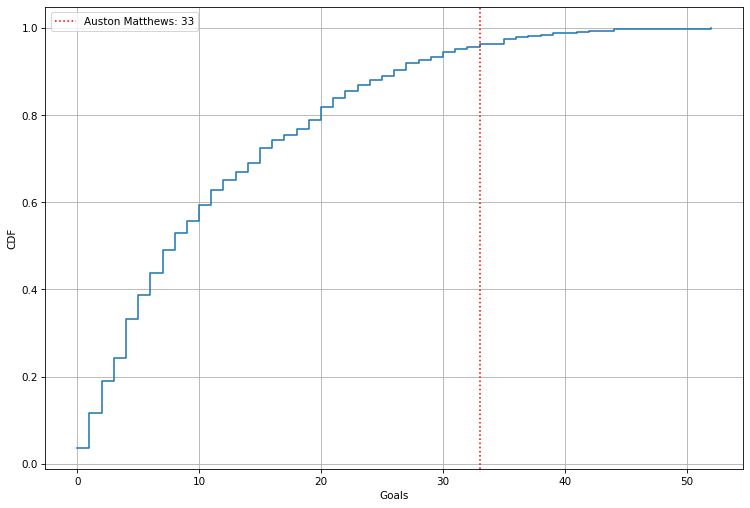

In [51]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Goals")

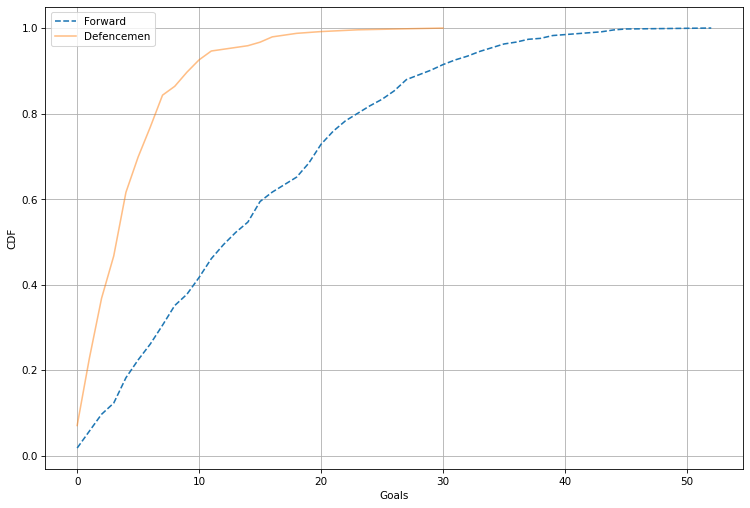

In [63]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Goals")

Auston Matthews - Percentile rank: 95.85


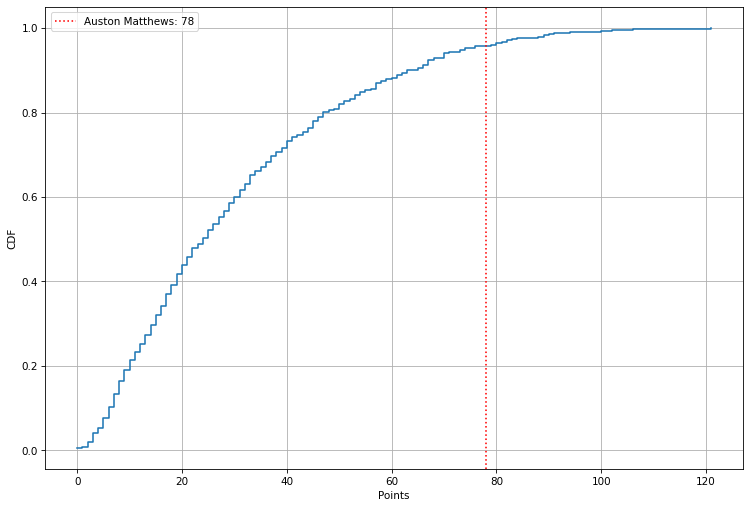

In [40]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Points")

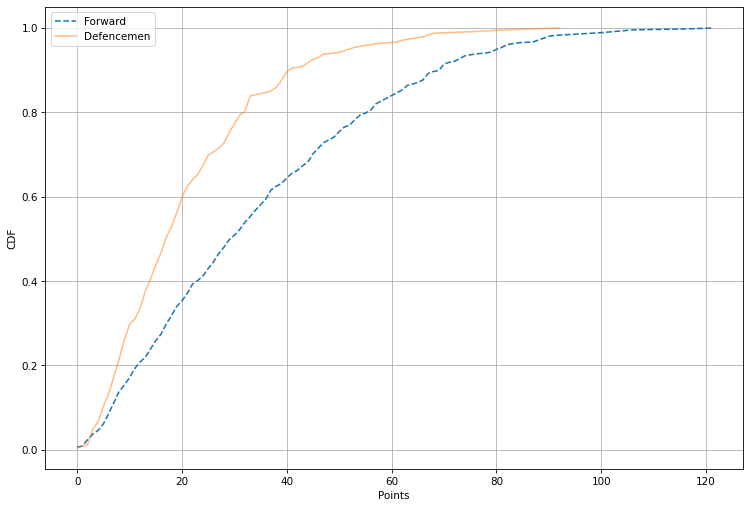

In [64]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Points")

Auston Matthews - Percentile rank: 47.42


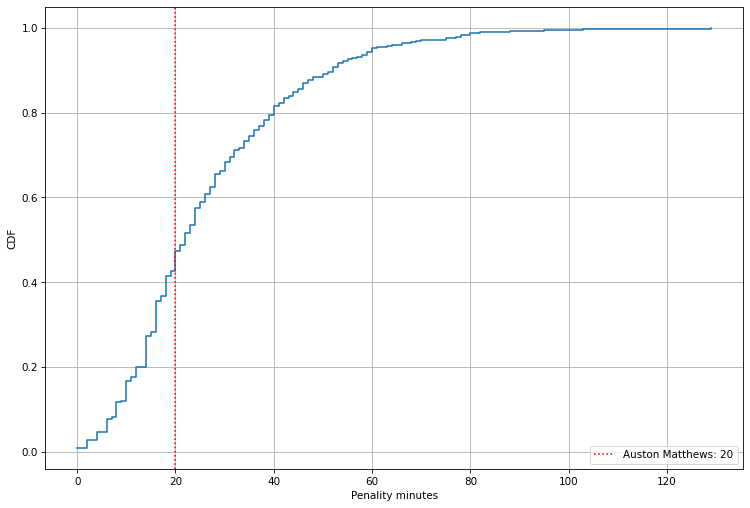

In [41]:
situation = "all"
feature = "I_F_penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Penality minutes")

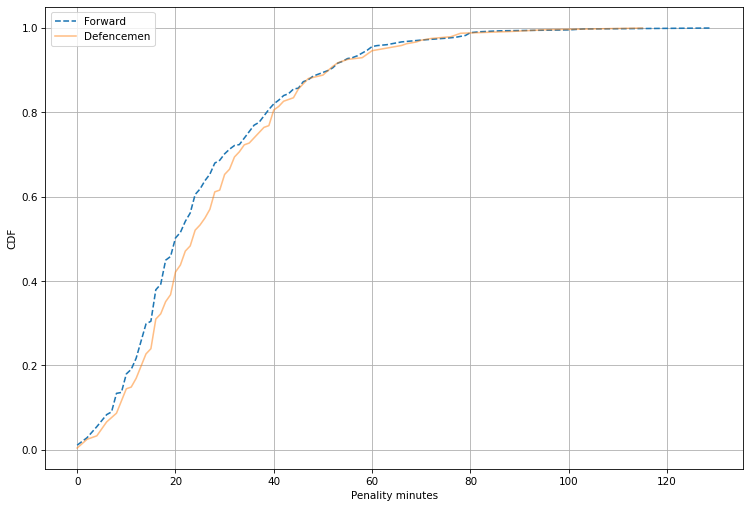

In [65]:
situation = "all"
feature = "I_F_penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Penality minutes")

Auston Matthews - Percentile rank: 69.63


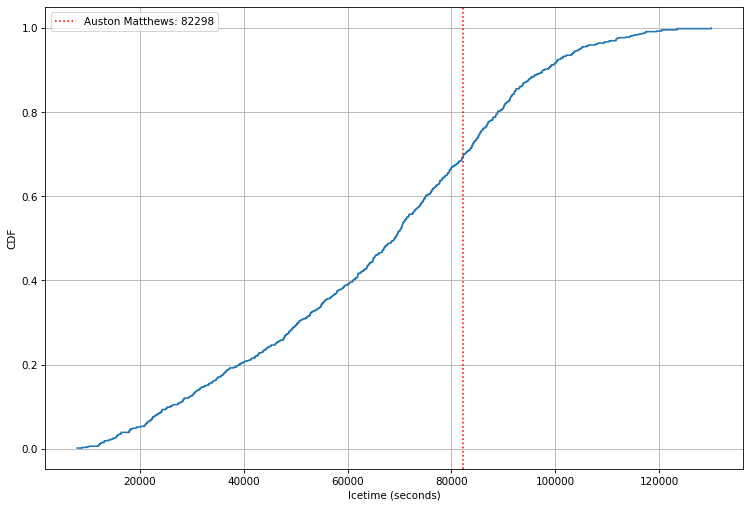

In [67]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Icetime (seconds)")

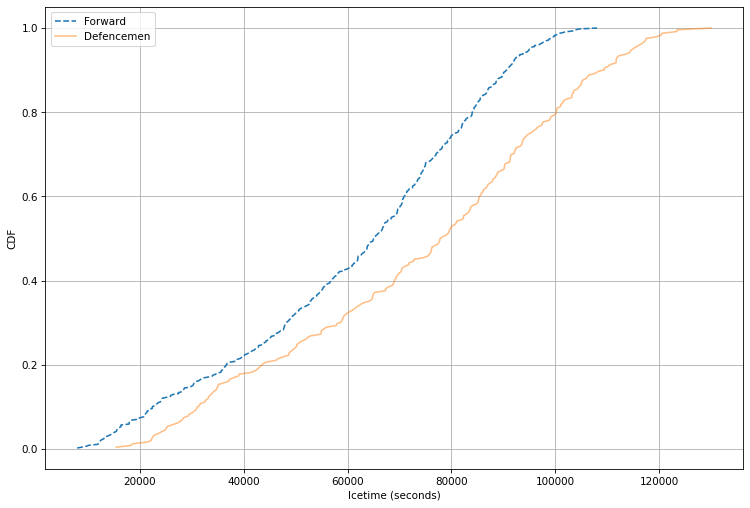

In [68]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Icetime (seconds)")

Auston Matthews - Percentile rank: 34.10


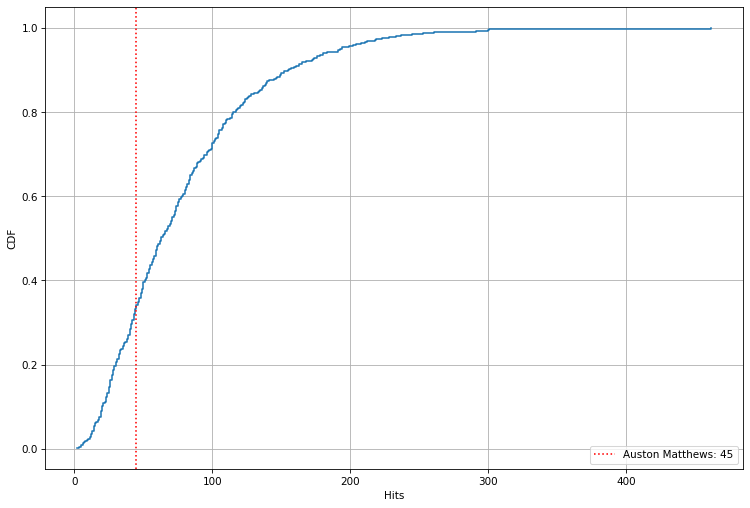

In [46]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Hits")

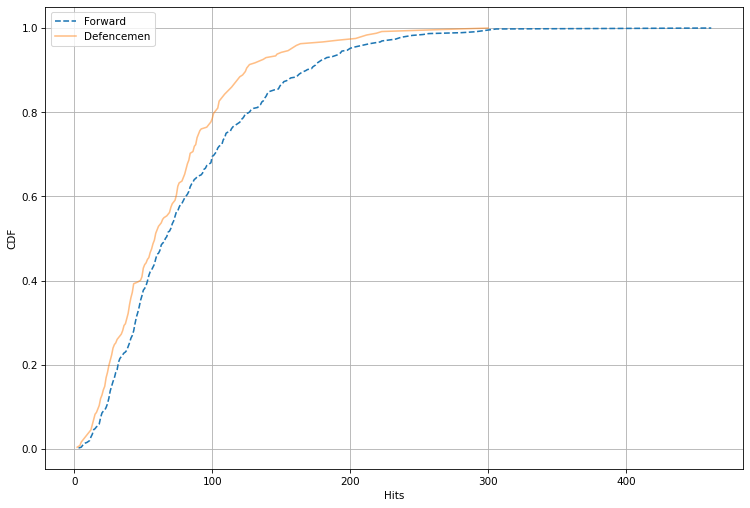

In [69]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Hits")

Auston Matthews - Percentile rank: 82.52


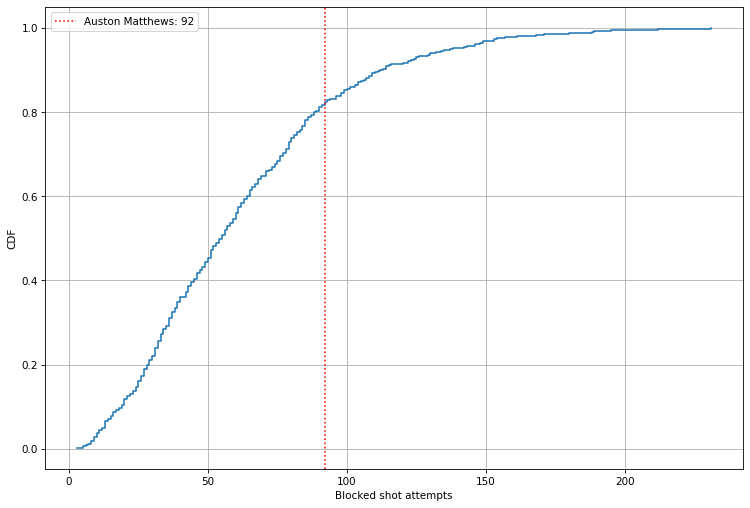

In [47]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Blocked shot attempts")

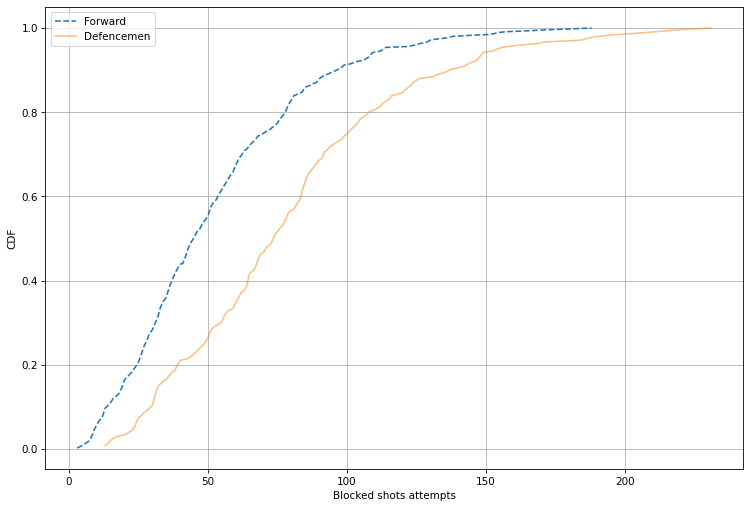

In [70]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Blocked shots attempts")

Auston Matthews - Percentile rank: 100.00


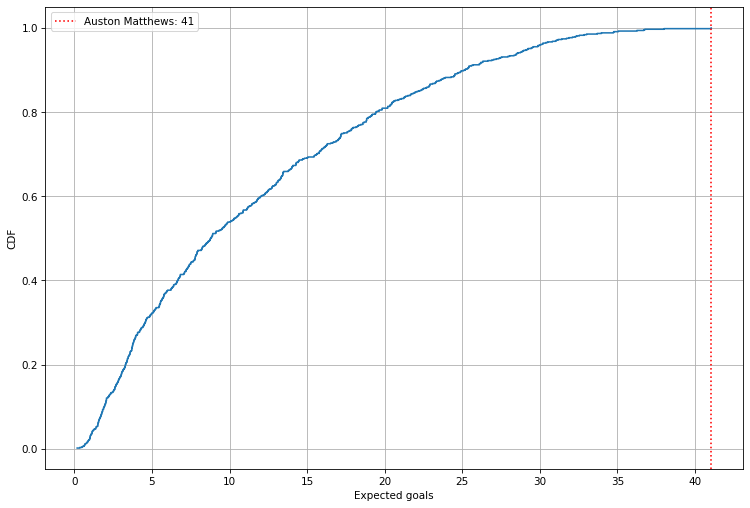

In [48]:
situation = "all"
feature = "I_F_xGoals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Expected goals")

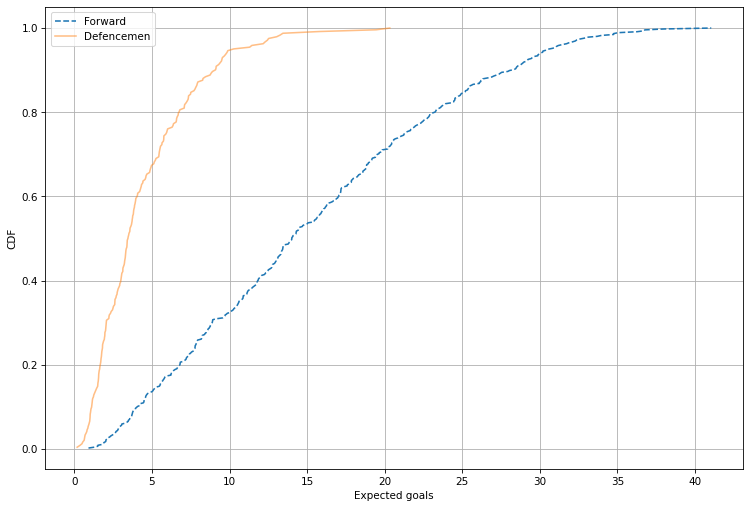

In [72]:
situation = "all"
feature = "I_F_xGoals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Expected goals")